In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.12.0'

In [4]:
keras.__version__

'2.12.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#Keras provides some utility functions to fetch and load common datasets

In [7]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

create validation set, train the neural network using Gradient Descent
scale the input features i.e the pixel intensities down to the 0–1 range by dividing them by 255.0

In [ ]:
X_valid

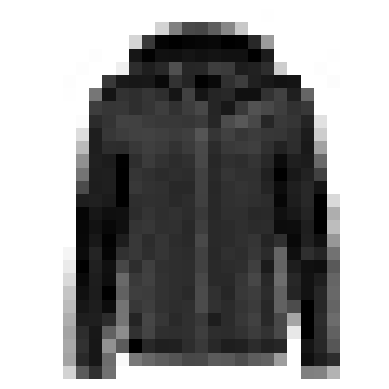

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

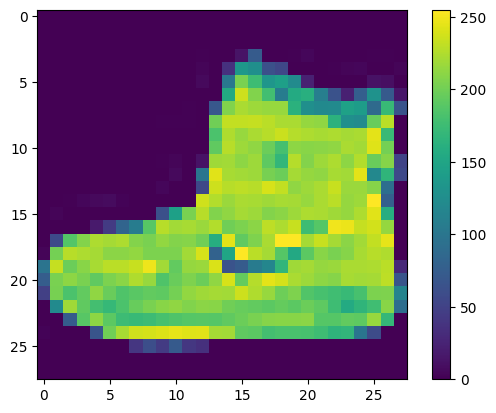

In [15]:
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
class_names[y_train[0]]

'Coat'

In [19]:
X_valid.shape

(5000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

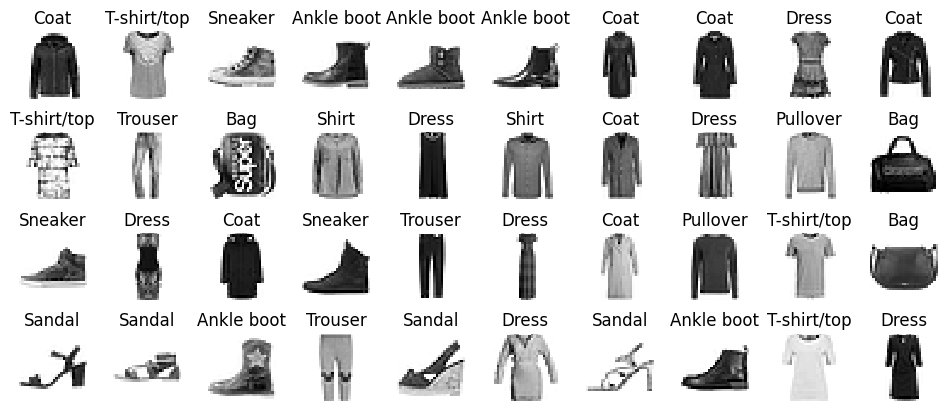

In [25]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [26]:
model = keras.models.Sequential()
#layers connected sequentially
model.add(keras.layers.Flatten(input_shape=[28,28]))
#role is to convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu"))
#Dense hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#Dense output layer with 10 neurons (one per class)

In [27]:
import numpy as np

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

In [32]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [33]:
model.get_layer(hidden1.name) is hidden1

True

In [34]:
weights, biases = hidden1.get_weights()

In [ ]:
weights,biases

In [39]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7223 - accuracy: 0.7628 - val_loss: 0.5152 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4889 - accuracy: 0.8282 - val_loss: 0.4379 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8438 - val_loss: 0.5035 - val_accuracy: 0.8156
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8548 - val_loss: 0.3975 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3952 - accuracy: 0.8614 - val_loss: 0.3769 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3761 - accuracy: 0.8672 - val_loss: 0.3684 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3608 - val_accuracy:

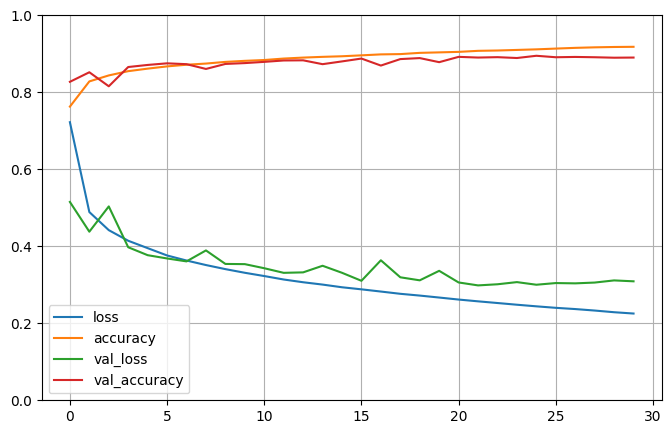

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# set the vertical range to [0-1]
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8838


[0.34048664569854736, 0.8838000297546387]

In [43]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 64ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
predict_x=model.predict(X_new)
y_pred=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 30ms/step


In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

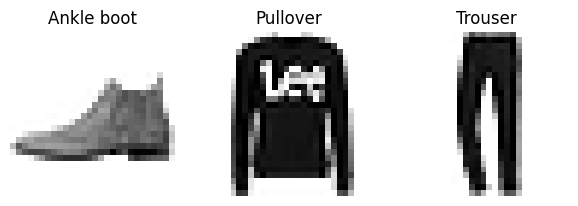

In [47]:
plt.figure(figsize=(7.2,2.4))
for index, image in enumerate (X_new):
  plt.subplot(1,3, index +1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis('off')
  plt.title(class_names[y_test[index]], fontsize=12)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()